Decompose video into frames

In [1]:
from imutils import contours 
from skimage import measure  
import numpy as np          
import argparse
import imutils
import matplotlib.pyplot as plt
import cv2

vidcap = cv2.VideoCapture('VID_20220519_122432.mp4')

success, image = vidcap.read()
count = 1
while success:
  cv2.imwrite("pattern/image_%d.jpg" % count, image)    
  success, image = vidcap.read()
  count += 1

print("Saved", count, "images")

Saved 321 images


In [2]:
def plot_imshow_in_array(matrices_to_show:list , max_image_in_row:int = 4 , plots_kwargs_list:list = []):
    """
        Plots the image list in an array of row * col , where max(col) = max_image_in_row, and the 
        number of rows is calculated accordingly. 
        @param matrices_to_show a list of matrices to be plotted using plt.imshow
        @param max_image_in_row maximum number of plots in one row
        @param plots_kwargs_list list of dictionaries of parameters of each plot
        
    """    
    ## total number of plots
    plot_count = len(matrices_to_show)
    
    assert len(plots_kwargs_list) == 0 or len(plots_kwargs_list) == len(matrices_to_show) , """ plots_kwargs_list should be either an empty 
                                                                                    list or should have the same number of members
                                                                                    as matrices_to_show """
    
    ## number of rows
    nrow = plot_count // max_image_in_row + (1 if (plot_count % max_image_in_row > 0) else 0)
    
    ## number of columns
    ncol = max_image_in_row if plot_count >= max_image_in_row else plot_count
    
    ## plotting using imshow
    fig , ax = plt.subplots(nrow , ncol , figsize = (12 , 6))
    for i in range(plot_count):
        
        ## select the subplot
        plt.subplot(nrow , ncol , i+1 )
        
        ## format the argument dictionary of the imshow function
        if(len(plots_kwargs_list) == 0):
            config_dict = {}
        else: 
            config_dict = plots_kwargs_list[i]
        
        ## pass the image as well as extra arguments to the imshow function
        plt.imshow(matrices_to_show[i] , **config_dict)
        
    return fig , ax 

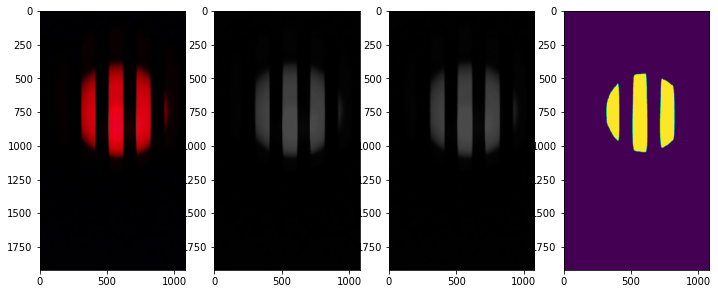

In [17]:

image_address = "./pattern/image_1.jpg"

## read the image
image = cv2.imread(image_address)

## convert BGR to RGB, we won't use this in any of the processes, just to test image loading
rgb_image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB) 

## convert BGR to greyscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## blur the image with a gussian filter to remove any noise, and also to soften the image
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

thresh = cv2.threshold(blurred, 50 , 255 , cv2.THRESH_BINARY)[1]

# ## plot images in a nice array. We have to define the colormap for imshow to get a black and white image, as the default 
# ## color map shows colors between yellow (pixel = 255) and black (pixel = 0)
fig , ax = plot_imshow_in_array([rgb_image , gray , blurred, thresh] , \
                                max_image_in_row = 4 , \
                                plots_kwargs_list = [{} , {'cmap':'gray', 'vmin':0, 'vmax':255} , {'cmap':'gray', 'vmin':0, 'vmax':255}, {}] )



[315, 94, 97, 111, 93, 108, 262]


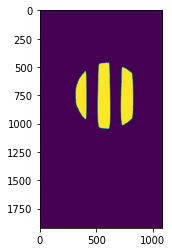

In [19]:
(rows, columns) = thresh.shape[:2]

best_row_index = 0
best_row_count = 0

for row in range(0, rows):
    cur_count = 0
    for column in range(0, columns):
        # count 255s in row
        if (thresh[row, column] == 255):
            cur_count += 1
    if cur_count > best_row_count:
        best_row_index = row
        best_row_count = cur_count

# thresh[best_row_index,:] = 255

regions = []

last = -1
cnt = 0
for i in range(0, columns):
    if last != -1 and thresh[best_row_index, i] != last:
        last = thresh[best_row_index, i]
        regions.append(cnt)
        cnt = 0
    last = thresh[best_row_index, i]
    cnt += 1

regions.append(cnt)
print(regions)
print(sum(regions))

plt.imshow(thresh)
plt.show()